# Task 3 labels

In [18]:
import scanpy as sc
import pandas as pd

In [8]:
adata = sc.read('task3_coarse.h5ad')

In [13]:
adata.obs['coarse_ct'] = adata.obs['qual_ct'].apply(lambda x: 'B' if x=='B?' else x)
adata.obs['coarse_ct'] = adata.obs['coarse_ct'].apply(lambda x: 'cDC' if x=='DC' else x)
adata.obs['coarse_ct'] = adata.obs['coarse_ct'].apply(lambda x: 'pDC' if x=='Megakaryocyte' else x)
adata.obs['coarse_ct'] = adata.obs['coarse_ct'].apply(lambda x: 'Unreliable' if x=='??' else x)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


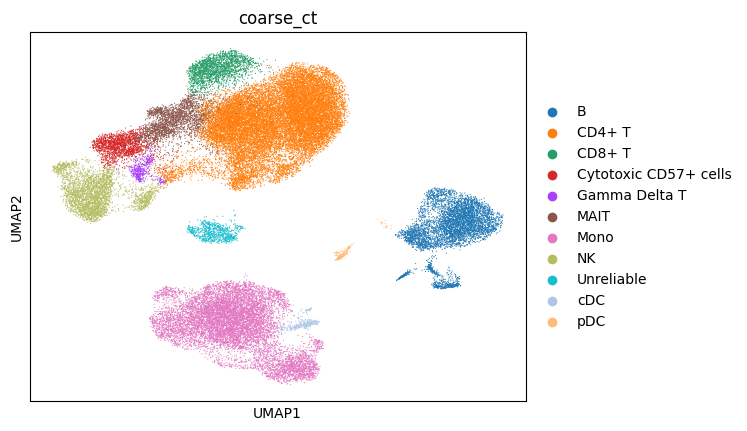

In [15]:
sc.pl.umap(adata, color='coarse_ct', save='task3_coarse_umap.png')

In [22]:
pd.DataFrame(zip(adata.obs.index, adata.obs['coarse_ct']), columns=['cell_ids', 'cell_type'])\
    .to_csv('task3.coarse_cell_types.csv', index=False)

In [23]:
adata.write('task3_coarse.h5ad')

### Fine labels

In [26]:
b_fine = sc.read('b_fine.h5ad').obs['fine_ct']
cd4_fine = sc.read('cd4_fine.h5ad').obs['fine_ct']
cd8_fine = sc.read('cd8_fine.h5ad').obs['fine_ct']
mono_fine = sc.read('mono_fine.h5ad').obs['fine_ct']
nk_fine = sc.read('nk_fine.h5ad').obs['fine_ct']

In [48]:
nk_fine.value_counts()

fine_ct
CD56dim CD16bright NK    2614
??                        513
CD56bright CD16low NK     263
Name: count, dtype: int64

In [54]:
meta = adata.obs.copy()

In [55]:
meta['fine_ct'] = meta['coarse_ct'].tolist()

In [56]:
meta.loc[b_fine.index, 'fine_ct'] = b_fine.values.tolist()
meta.loc[cd4_fine.index, 'fine_ct'] = cd4_fine.values.tolist()
meta.loc[cd8_fine.index, 'fine_ct'] = cd8_fine.values.tolist()
meta.loc[mono_fine.index, 'fine_ct'] = mono_fine.values.tolist()
meta.loc[nk_fine.index, 'fine_ct'] = nk_fine.values.tolist()

In [57]:
adata.obs = meta.copy()

In [58]:
adata.obs['fine_ct'] = adata.obs['fine_ct'].apply(lambda x: 'CD56 CD16 Double Positive NK' if x == '??' else x)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


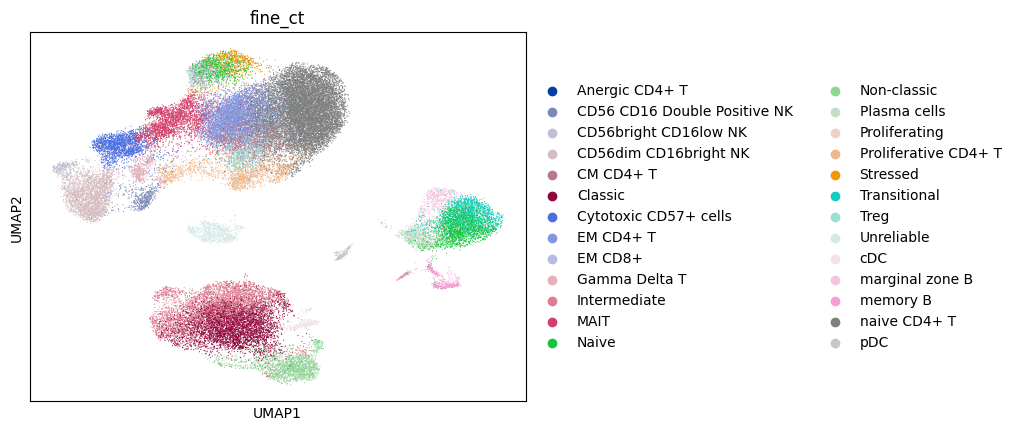

In [59]:
sc.pl.umap(adata, color='fine_ct', save='task3_fine_umap.png')

In [61]:
pd.DataFrame(zip(adata.obs.index, adata.obs['fine_ct']), columns=['cell_ids', 'cell_type'])\
    .to_csv('task3.fine_cell_types.csv', index=False)

In [62]:
adata.write('task3_fine.h5ad')

In [27]:
adata

AnnData object with n_obs × n_vars = 48518 × 1700
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'siccaid', 'pSS', 'ssa', 'percent.mt', 'percent.ribo', 'PoolID', 'nCount_ADT', 'nFeature_ADT', 'age', 'sex', 'b_tobacco', 'ssb', 'fs', 'fs_detailed', 'b_lymphoma', 'b_systinvol', 'immune_meds', 'lympho', 'is_pool_GN21', 'is_pool_GN22', 'is_pool_GN27', 'leiden', 'is_9', 'is_2', 'is_4', 'is_0', 'is_14', 'is_7', 'is_1', 'is_5', 'is_11', 'is_3', 'is_6', 'is_10', 'is_16', 'is_13', 'is_22', 'is_8', 'is_19', 'is_18', 'is_17', 'is_21', 'is_20', 'is_15', 'is_12', 'qual_ct', 'coarse_ct'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PoolID_colors', 'hvg', 'is_0_colors', 'is_10_colors', 'is_11_colors', 'is_12_colors', 'is_13_colors', 'is_14_colors', 'is_15_colors', 'is_16_colors', 'is_17_colors', 'is_18_colors', 'is_19_colors', 'is_1_colors', 'is_20_colors', 'is_21_colors', 'is_22_colors', 'is_2_colors', 'is_3_colors', 'is_4_colors', '